# Parcial 3 Modelado

- ### Primer Punto
    ### Modelo SIR
   
    $$\frac{dS}{dt}=-\beta \frac{SI}{N}$$
    $$\frac{dI}{dt}=\beta \frac{SI}{N}-\gamma I$$
    $$\frac{dR}{dt}=\gamma I$$

   

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
#### Read data ####

df = pd.read_csv('./influenza_data.csv')
infected = df['AH1']+df['AH3']+df['A_untyped']+df['B']

# just B influenza cases
infected = df['B']

time = df['week']

time = time[7:]
infected = infected[7:]
print(time.iloc[0])

47


(None,
 Text(0.5, 1.0, 'Confirmed B influenza cases'))

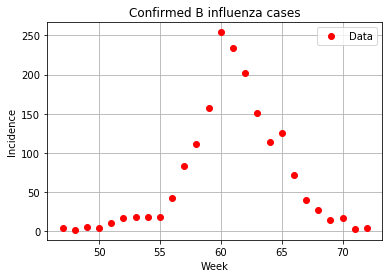

In [4]:
plt.plot(time,infected,'ro',label='Data')
plt.xlabel('Week'), plt.ylabel('Incidence')
plt.grid(), plt.legend(), plt.title('Confirmed B influenza cases')

In [5]:
def SIR_model(state,time,beta,gamma, N):
    S, I, R = state
    dSdt = -beta*S*I/N
    dIdt = beta*S*I/N - gamma*I
    dRdt = gamma*I
    return [dSdt,dIdt,dRdt]
def modelo_sir(N, gamma_mine,Ro, t0):
    beta_mine = gamma_mine*Ro 
    t_span =np.arange(t0,t0*10,1) # daily simulation

    # For initial conditions we suppose just 1 person is infected
    y0 = [N-1,1,0] #initial conditions 
    return(odeint(SIR_model, y0, t_span, args=(beta_mine, gamma_mine, N)) )#solve using ODE
def proba_Q(xi, miu):
    var=5
    p = ((1/np.sqrt(var*2*np.pi))*np.exp(-(xi-miu)**2/(2*var)))
    return(p)

def likelihood(x_data,miu):
    l=1
    for x in x_data:
        l = l * proba_Q(x, miu)
    return(miu, l)



In [6]:
gamma=1/3
Ro=2
t0=45
N= 5.2e+07
y=modelo_sir(N, gamma,Ro, t0) 
beta= gamma*Ro 
S = y[:,0]
I = y[:,1]
R = y[:,2]

t_span =np.arange(t0,t0*10,1)
kernel  = np.ones(7)
incidente_pred=[]
i=0
while i<len(S)-7:
    incidente_pred.append(-(S[i+7]-S[i]))
    i=+1
incidente_pred = np.append(1,incidente_pred)
frac_confirmed = sum(infected)/sum(incidente_pred)
incidente_pred = incidente_pred*frac_confirmed
time_sim_week=np.linspace(min(t_span),maxmin(t_span), len(incidente_pred) )

KeyboardInterrupt: 

In [ ]:
plt.plot(time_sim_week,incidente_pred )

In [ ]:
### Plot solution ###
S = y[:,0]
I = y[:,1]
R = y[:,2]

plt.plot(t_span,S,'g',t_span,I,'r',t_span,R,'b')
plt.xlabel('Time'), plt.ylabel('Incidence')
plt.legend(['Susceptibles','Infected','Recovered']), plt.grid()

In [ ]:
# 1. (10 puntos) Reproducir la Figura 2.1 del capítulo 2 del libro de Sivia, 
# pero usando los siguientes cuatro casos 
# {N_cara=1, N_sello=0},{ N_cara=4, N_sello=6}, 
# {N_cara=35, N_sello=65}, {N_cara=320, N_sello=680}.

def proba_h(h, cara):
    if cara==0:
        return h
    if cara==1:
        return 1-h
def likelihood(n_cara, n_sello, n_points=100):
    h = np.linspace(0,1, n_points)
    l = np.ones(n_points)
    for i in range(n_cara):
        l = l * proba_h(h, 0)
    for i in range(n_sello):
        l = l * proba_h(h, 1)
    return h, l

def plot_likelihood(n_cara, n_sello):
    h, l = likelihood(n_cara, n_sello)
    plt.plot(h, l/l.max())
    plt.xlabel("H")
    plt.ylabel("P(H|datos)")
    label = "$N_c = {}, N_s = {}$".format(n_cara, n_sello)
    plt.title(label)
    

plt.figure(figsize=(5,5))
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)

datos = [[1, 0], [4, 6], [35, 65], [320, 680]]
for i in range(len(datos)):
    plt.subplot(2,2,i+1)
    print(datos[i][0], datos[i][1])
    plot_likelihood(datos[i][0], datos[i][1])

plt.savefig("monedas.png", bbox_inches="tight")

    

#2. (20 puntos) Implementar el código necesario para reproducir la Figura 2.9 (P(alpha|[x_i], beta)) del mismo libro, pero asumiendo solamente cuatro mediciones, x = [-5.2, -3.1, -2.8, -3.5] y ademas que beta=3.0.

def proba_alpha(alpha, x, beta=3.0):
    p = beta/np.pi
    p = p / (beta**2 + (x-alpha)**2)
    return p

def likelihood(x_data, n_points=100):
    alpha = np.linspace(-10,4,n_points)
    l = np.ones(n_points)
    for x in x_data:
        l = l * proba_alpha(alpha, x)
    return alpha, l

def plot_likelihood(x_data):
    alpha,l = likelihood(x_data)
    plt.plot(alpha, l/l.max())
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'P($\alpha$|x)')
    label = 'x = {}'.format(x_data)
    plt.title(label)


plt.figure(figsize=(5,5))
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)

datos = np.array([-5.2, -3.1, -2.8, -3.5])
for i in range(len(datos)):
    plt.subplot(2,2,i+1)
    print(datos[:i+1])
    plot_likelihood(datos[:i+1])

plt.savefig("faro.png", bbox_inches="tight")

# 3. (70 puntos) Graficar P(Q|[x_i]) donde x_i=[0.5, 1.0, 0.8, 0.9] son 
#mediciones de las posiciones de desintegración de unas partículas, 
#donde estas posiciones siguen la densidad de probabilidad P(x|Q) = Qexp(-Qx).
# La gráfica debe tener cuatro paneles que muestran el cambio en la densidad 
# de probabilidad a medida que llegan nuevas mediciones.


def proba_Q(Q, x):
    p = Q * np.exp(-Q*x)
    return p

def likelihood(x_data, n_points=100):
    Q = np.linspace(1E-2,4.0, n_points)
    l = np.ones(n_points)
    for x in x_data:
        l = l * proba_Q(Q, x)
    return Q, l

def plot_likelihood(x_data):
    Q,l = likelihood(x_data)
    plt.plot(Q, l/l.max())
    plt.xlabel(r'$Q$')
    plt.ylabel(r'P($Q$|x)')
    label = 'x = {}'.format(x_data)
    plt.title(label)


plt.figure(figsize=(5,5))
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)

datos = np.array([0.5, 1.0, 0.8, 0.9])
for i in range(len(datos)):
    plt.subplot(2,2,i+1)
    print(datos[:i+1])
    plot_likelihood(datos[:i+1])

plt.savefig("decae.png", bbox_inches="tight")

In [188]:
def compute_l2_error(x,y):
    
    return np.sum((x-y)**2)/x.size

[0.02105129]


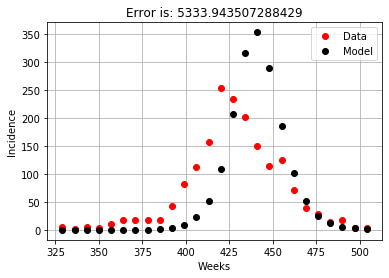

In [189]:
############ Plot Cases and our solution

kernel  = np.ones(7)
S_weeks = np.convolve(S,kernel,mode='same')

incidente_pred = -np.diff(S[ np.isin(t_span,time) ])
incidente_pred = np.append(1,incidente_pred)
frac_confirmed = sum(infected)/sum(incidente_pred)
incidente_pred = incidente_pred*frac_confirmed

time_sim_week = t_span[np.isin(t_span,time)]


plt.plot(time,infected,'ro',time_sim_week,incidente_pred,'ko')
plt.legend(['Data','Model']), plt.xlabel('Weeks'), plt.ylabel('Incidence')
plt.grid()
plt.title('Error is: {}'.format(compute_l2_error(infected,incidente_pred)))
print(incidente_pred[time_sim_week==350])

In [216]:
gamma = np.arange(0.1,3,0.05)
beta = np.arange(0.1,3,0.05)

l2_error_mat = np.zeros((gamma.size,beta.size))

def l2_error(beta,gamma,model,t_span,time,observation):
    
    
    y = odeint(model, y0, t_span, args=(beta, gamma)) #solve using ODE
    S = y[:,0]
    incidente_pred = -np.diff(S[ np.isin(t_span,time) ])
    incidente_pred = np.append(1,incidente_pred)
    frac_confirmed = sum(observation)/sum(incidente_pred)
    incidente_pred = incidente_pred*frac_confirmed

    
    err = compute_l2_error(observation,incidente_pred)
    
    return err

observation = infected

for i, gammax in enumerate(gamma):
    for j, betax in enumerate(beta):
        
        l2_error_mat[i,j] = l2_error(betax,gammax,SIR_model,t_span,time,observation)

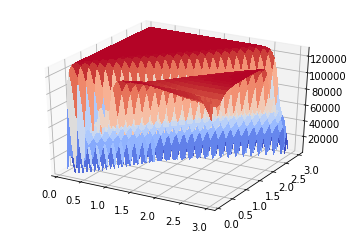

In [218]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.

gammav, betav = np.meshgrid(gamma,beta)

surf = ax.plot_surface(gammav, betav, l2_error_mat, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.view_init(90, 180)



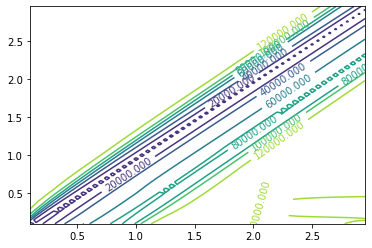

In [223]:
contours = plt.contour(gammav, betav, l2_error_mat)

# Display z values on contour lines
plt.clabel(contours, inline=10, fontsize=10)

# Display the contour plot
plt.show()

(58, 58)


Text(0, 0.5, 'beta')

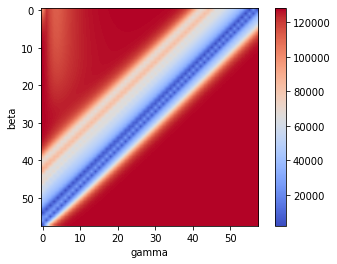

In [226]:
plt.imshow(np.flip(np.transpose((l2_error_mat)),0), interpolation='bilinear', cmap=cm.coolwarm)
plt.colorbar()

print(l2_error_mat.shape)
tick_num = gamma.size
ax.view_init(30, 90)

plt.set_xticks([0,14,28,58])
plt.set_xlabels([‘0’, ‘four’,’six’, ‘3’])

plt.xlabel('gamma')
plt.ylabel('beta')

In [227]:
58/4

14.5